In [1]:
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import datetime as dt
from dateutil.relativedelta import relativedelta

In [2]:
f = open('inputs/day04_test.txt')
data = f.read().split('\n')

In [3]:
def parse_line(line):
    line = line.split(']')
    line[0] = line[0].replace('[', '')
    return line

In [4]:
lines = [parse_line(d) for d in data]
log = pd.DataFrame(lines, columns=['occurred_at', 'instruction'])
log['occurred_at'] = pd.Series([dt.datetime.strptime(x, '%Y-%m-%d %H:%M') + relativedelta(years=500) for x in log.occurred_at])
log.sort_values('occurred_at', inplace=True)
log.reset_index(drop=True, inplace=True)
log['occurred_date'] = log.occurred_at.dt.date
log['occurred_min'] = log.occurred_at.dt.minute

In [5]:
current_guard = None
guard_ids = []
for inst in log.instruction:
    obj = re.search('[0-9]+', inst)
    if obj is not None:
        current_guard = int(obj.group())
    guard_ids.append(current_guard)
log['guard_id'] = pd.Series(guard_ids)

In [6]:
idx = pd.MultiIndex.from_product([log.occurred_date.unique(), log.guard_id.unique()],
                                 names=['occurred_date', 'guard_id'])
col = np.arange(0,60,1)

sleep = pd.DataFrame(False, idx, col)

sleep.head()

0      1      2      3      4      5      6   \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           7      8      9      10     11     12     13  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           14     15     16     17     18     19     20  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           21     22     23     24     25     26     27  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           28     29     30     31     32     33     34  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           35     36     37     38     39     40     41  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           42     43     44     45     46     47     48  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  False  False  False  False   
              2833      False  False  False  False  False  False  False   
              941       False  False  False  False  False  False  False   

                           49     50     51     52     53     54     55  \
occurred_date guard_id                                                    
2018-03-04    659       False  False  False  False  False  False  False   
              2161      False  False  False  False  False  False  False   
              2917      False  False  False  

In [7]:
log_g = log.groupby(['occurred_date', 'guard_id', ])
for k, g in log_g:
    status = 'awake'
    for inst, min in zip(g.instruction, g.occurred_min):
        # set state of current guard
        if inst == ' falls asleep':
            status = 'asleep'
            sleep_time = min
        elif inst == ' wakes up':
            status = 'awake'
            sleep.loc[k,sleep_time:min-1] = True

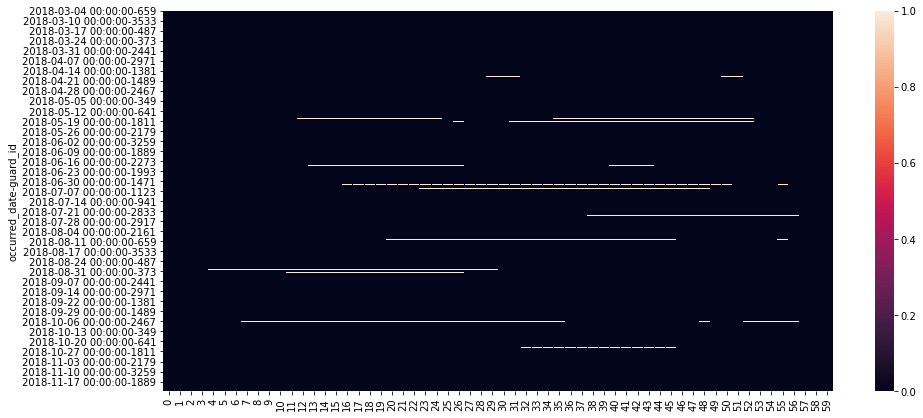

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(sleep)

# Part 1

What is the guard with the most number of minutes asleep?  
What minute do they spend asleep the most?

In [9]:
melted = pd.melt(sleep.reset_index(), id_vars=['guard_id', 'occurred_date'], var_name='min')
guard_id = melted.groupby('guard_id').value.sum().sort_values(ascending=False).index[0]
guard_id

2917

In [14]:
melted_sum_by_min = melted.groupby(['guard_id', 'min']).value.sum()
max_asleep_min_value = max(melted_sum_by_min[guard_id])
min = melted_sum_by_min[guard_id][melted_sum_by_min[guard_id] == max_asleep_min_value].index[0]
min

25

In [16]:
min * guard_id

72925

# Part 2

Of all guards, which guard is most frequently asleep on the same minute?

In [39]:
slept_by_guard_and_min = melted.groupby(['guard_id', 'min']).value.sum()
max_slept_val = slept_by_guard_and_min.max()
ans2 = slept_by_guard_and_min[slept_by_guard_and_min == max_slept_val]
ans2

guard_id  min
1489      33     18.0
Name: value, dtype: float64

In [40]:
ans2 = pd.DataFrame(ans2).reset_index()
ans2['min'] * ans2['guard_id']

0    49137
dtype: int64